In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = 'twitter_training.csv'
df = pd.read_csv(file_path)
df.columns = ['ID', 'Topic', 'Sentiment', 'Text']

df.head()


,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
def clean_text(text):
    if isinstance(text, str): 
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text)
        return text
    else:
        return "" 
df['Cleaned_Text'] = df['Text'].apply(clean_text)
df[['Text', 'Cleaned_Text']].head()


,Text,Cleaned_Text
0,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
2,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...
4,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


C:\Users\Om Dave\AppData\Local\Temp\ipykernel_9172\1992821687.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2')


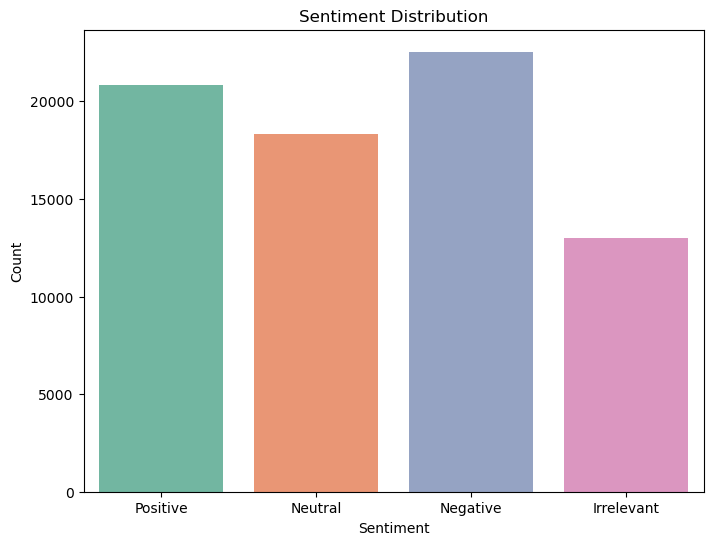

In [4]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


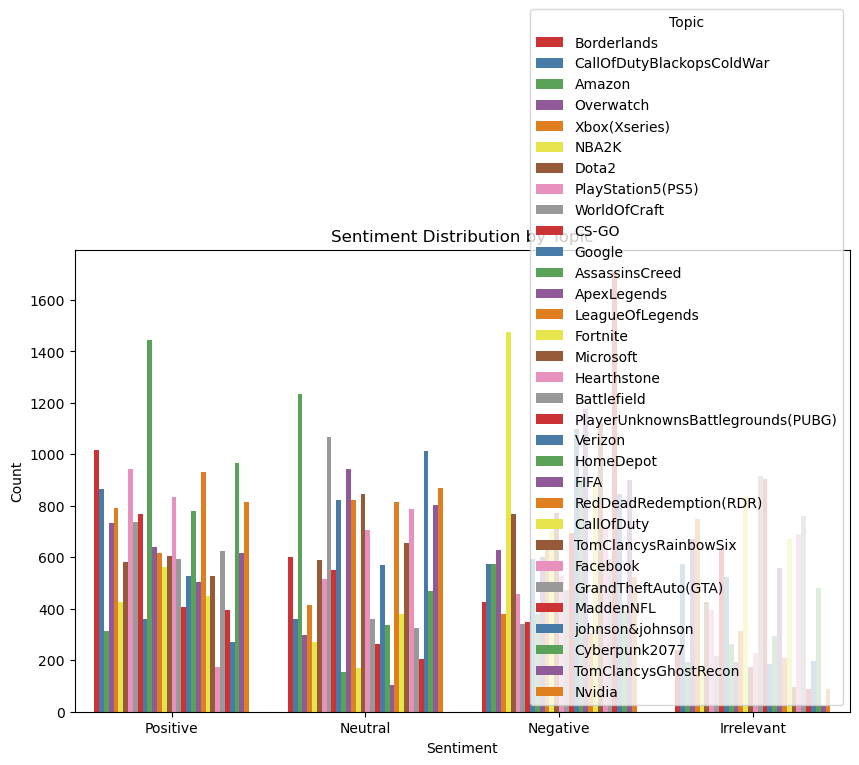

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sentiment', hue='Topic', data=df, palette='Set1')
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


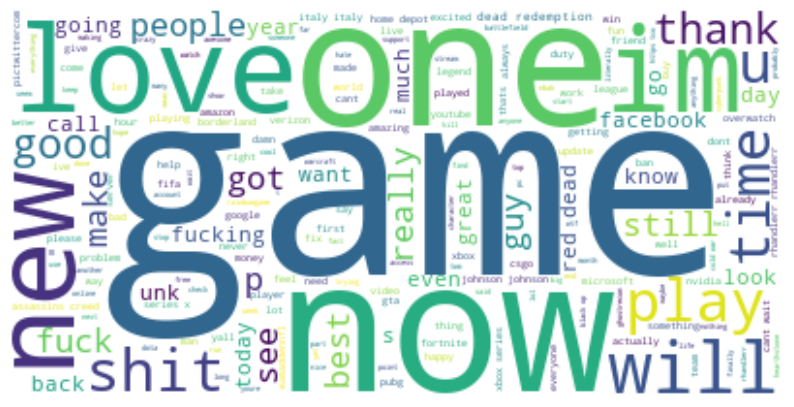

In [7]:
from wordcloud import WordCloud
plt.figure(figsize=(10,8))
text = ' '.join(df['Cleaned_Text'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


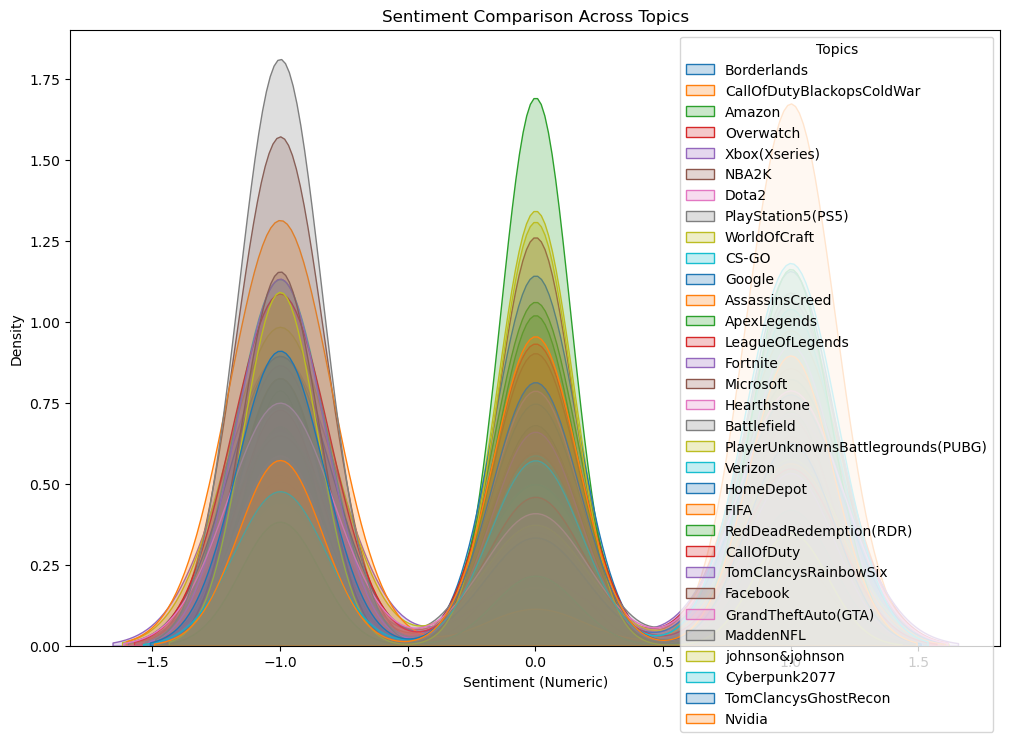

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = 'twitter_training.csv'
df = pd.read_csv(file_path)
df.columns = ['ID', 'Topic', 'Sentiment', 'Text']
sentiment_mapping = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
df['Sentiment_Numeric'] = df['Sentiment'].map(sentiment_mapping)

topics = df['Topic'].unique()

plt.figure(figsize=(12,8))
for topic in topics:
    subset = df[df['Topic'] == topic]
    sns.kdeplot(subset['Sentiment_Numeric'], label=topic, fill=True)

plt.title('Sentiment Comparison Across Topics')
plt.xlabel('Sentiment (Numeric)')
plt.ylabel('Density')
plt.legend(title='Topics')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


DataFrame Columns: Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


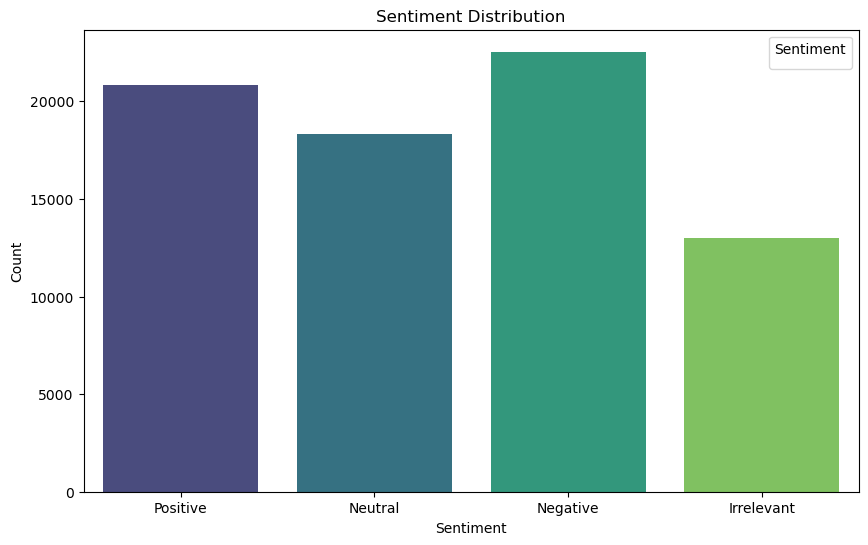

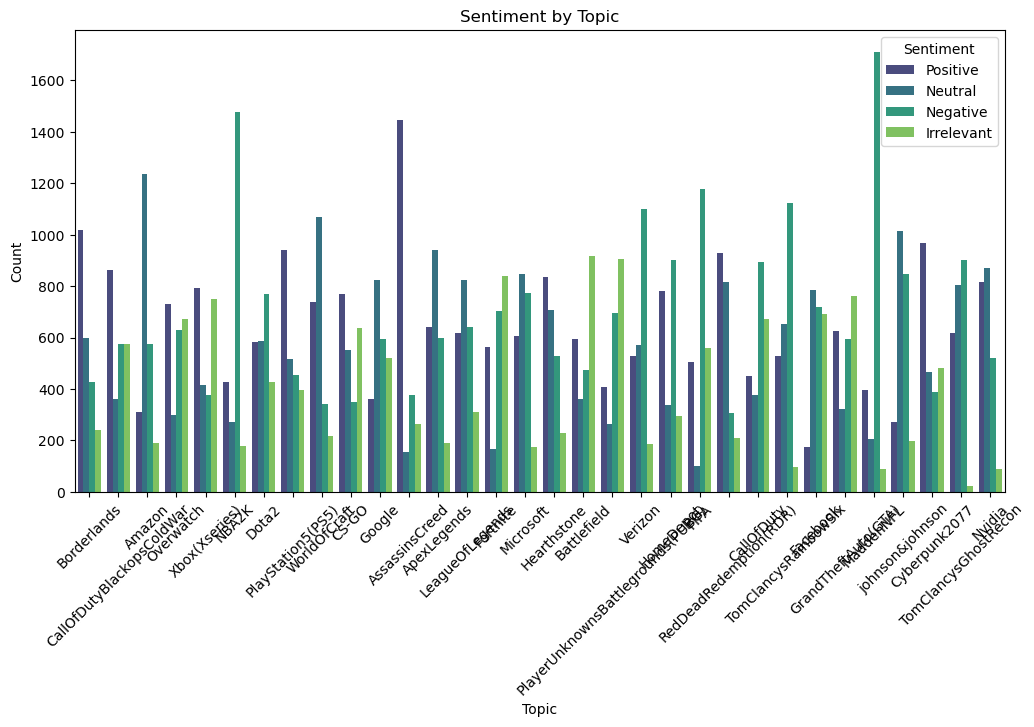

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'twitter_training.csv'
df = pd.read_csv(file_path)

print("DataFrame Columns:", df.columns)

df.columns = ['ID', 'Topic', 'Sentiment', 'Text'] 
sentiment_mapping = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
if 'Sentiment' in df.columns:
    df['Sentiment_Numeric'] = df['Sentiment'].map(sentiment_mapping)

    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Sentiment', palette='viridis', hue='Sentiment')
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.legend(title='Sentiment')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='Topic', hue='Sentiment', palette='viridis')
    plt.title('Sentiment by Topic')
    plt.xlabel('Topic')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Sentiment')
    plt.show()
else:
    print("No 'Sentiment' column found in the dataset. Please check the DataFrame.")
